In [15]:
import numpy as np
import math

import torch
import torchvision
from torch.utils.data import Dataset, DataLoader

In [21]:
class FahrenheitTemperatures(Dataset):
    def __init__(self, start=0, stop=212, size=5000):
        super(FahrenheitTemperatures, self).__init__()
        
        # Intialize local variables and covert them into tensors
        f_temp = np.random.randint(start, high=stop, size=size)
        c_temp = np.array([self._f2c(f) for f in f_temp])
        self.X = torch.from_numpy(f_temp).float()
        self.y = torch.from_numpy(c_temp).float()
        self.X_p = torch.from_numpy(np.arange(212, 170, -5, dtype=float))
        self.n_samples = self.X.shape[0]
        
    def __getitem__(self, index):
        # support indexing such that dataset[i] can be used to get i-th sample
        # implement this python function for indexing
        return self.X[index], self.y[index]
        
        
    def __len__(self):
        # we can call len(dataset) to return the size, so this can be used
        # as an iterator
        return self.n_samples
    
    def _f2c(sel,f) -> float:
        return (f - 32) * 5.0/9.0

In [22]:
def f2c(f) -> float:
    return (f - 32) * 5.0/9.0

In [23]:
# Let's now access our dataset
dataset =FahrenheitTemperatures()
first_dataset = dataset[12]
features, labels = first_dataset
print('Fahrenheit: {:.2f}'.format(features))
print('Celcius   : {:.2f}'.format(labels))
print('Celcius   : {:2f}'.format(f2c(features.item())))
print('Samples: {}'.format(len(dataset)))

Fahrenheit: 2.00
Celcius   : -16.67
Celcius   : -16.666667
Samples: 5000


In [24]:
# Now we can use the dataloader and iterator in a training loop

num_epochs = 2
batch_size = 4
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/batch_size)

print('Number of samples: {}'.format(total_samples))
print('Number of iterations: {}'.format(n_iterations))

Number of samples: 5000
Number of iterations: 1250


In [25]:
# Let's try Dataloader class and make this into an iterator and access the data as above
dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True)

dataiter = iter(dataloader)
data = dataiter.next()
feartures, labels = data

# since we specified our batch size to be 4, we'll see four features and labels
print('Fahrenheit: {}'.format(features))
print('Celcius   : {}'.format(labels))

Fahrenheit: 2.0
Celcius   : tensor([87.7778,  6.6667,  2.2222, 38.8889])


In [26]:
# let's do a dummy training loop

for epoch in range(num_epochs):
    # iterate over our dataloader in batches
    # Because we have implemented our Dataset class with __getitem__ and __len__, we
    # can iterate over it
    for i, (inputs, labels) in enumerate(dataloader):
        # forward and backward pass, update gradients, and zero them out
        # Run your training process
        if (i+1) % 400 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Step {i+1}/{n_iterations}| Inputs {inputs.shape} | Labels {labels.shape}, Tensors {inputs}')      

Epoch: 1/2, Step 400/1250| Inputs torch.Size([4]) | Labels torch.Size([4]), Tensors tensor([112.,  72.,  31.,  10.])
Epoch: 1/2, Step 800/1250| Inputs torch.Size([4]) | Labels torch.Size([4]), Tensors tensor([195.,  13.,   1.,  77.])
Epoch: 1/2, Step 1200/1250| Inputs torch.Size([4]) | Labels torch.Size([4]), Tensors tensor([103., 177.,  33.,  38.])
Epoch: 2/2, Step 400/1250| Inputs torch.Size([4]) | Labels torch.Size([4]), Tensors tensor([189., 197., 173., 174.])
Epoch: 2/2, Step 800/1250| Inputs torch.Size([4]) | Labels torch.Size([4]), Tensors tensor([208.,  33., 202.,  17.])
Epoch: 2/2, Step 1200/1250| Inputs torch.Size([4]) | Labels torch.Size([4]), Tensors tensor([ 59.,  78., 160., 142.])


In [27]:
X = torch.from_numpy(np.arange(1., 100.))
y = torch.from_numpy(np.array([(x*2) for x in X]))

In [28]:
X

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28.,
        29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
        43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
        57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69., 70.,
        71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82., 83., 84.,
        85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95., 96., 97., 98.,
        99.], dtype=torch.float64)

In [29]:
y

tensor([  2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,  22.,  24.,
         26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,  44.,  46.,  48.,
         50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,  66.,  68.,  70.,  72.,
         74.,  76.,  78.,  80.,  82.,  84.,  86.,  88.,  90.,  92.,  94.,  96.,
         98., 100., 102., 104., 106., 108., 110., 112., 114., 116., 118., 120.,
        122., 124., 126., 128., 130., 132., 134., 136., 138., 140., 142., 144.,
        146., 148., 150., 152., 154., 156., 158., 160., 162., 164., 166., 168.,
        170., 172., 174., 176., 178., 180., 182., 184., 186., 188., 190., 192.,
        194., 196., 198.], dtype=torch.float64)

In [30]:
x_data = torch.Tensor([[1.0], [2.0], [3.0]])
x_data, x_data.shape

(tensor([[1.],
         [2.],
         [3.]]),
 torch.Size([3, 1]))

In [31]:
x = X.view(-1, 1)
x, x.shape

(tensor([[ 1.],
         [ 2.],
         [ 3.],
         [ 4.],
         [ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.],
         [11.],
         [12.],
         [13.],
         [14.],
         [15.],
         [16.],
         [17.],
         [18.],
         [19.],
         [20.],
         [21.],
         [22.],
         [23.],
         [24.],
         [25.],
         [26.],
         [27.],
         [28.],
         [29.],
         [30.],
         [31.],
         [32.],
         [33.],
         [34.],
         [35.],
         [36.],
         [37.],
         [38.],
         [39.],
         [40.],
         [41.],
         [42.],
         [43.],
         [44.],
         [45.],
         [46.],
         [47.],
         [48.],
         [49.],
         [50.],
         [51.],
         [52.],
         [53.],
         [54.],
         [55.],
         [56.],
         [57.],
         [58.],
         [59.],
         [60.],
         [61.],
         [62.],
        

In [32]:
torch.arange(1, 5).view(-1, 1)

tensor([[1],
        [2],
        [3],
        [4]])

In [33]:
X = torch.arange(1, 10, dtype=np.float).view(-1, 1)
y = torch.from_numpy(np.array([(x * 2) for x in X], dtype=np.float)).view(-1, 1)

In [34]:
X

tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]], dtype=torch.float64)

In [35]:
y

tensor([[ 2.],
        [ 4.],
        [ 6.],
        [ 8.],
        [10.],
        [12.],
        [14.],
        [16.],
        [18.]], dtype=torch.float64)

### MNIST Fashion Dataset 

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [19]:
train_set = torchvision.datasets.FashionMNIST(
                root='./data/FMNIST',
                train=True,
                download=True,
                transform=transforms.Compose([transforms.ToTensor()]))
train_loader = torch.utils.data.DataLoader(train_set, batch_size=10)

In [7]:
import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120)

In [8]:
# number of images in our training set

In [9]:
len(train_set)

60000

In [12]:
# number of labels in the training set and their values (should be a number between 0 and 9)
len(train_set.train_labels), train_set.train_labels

(60000, tensor([9, 0, 0,  ..., 3, 0, 5]))

In [17]:
# gives you the frequency of occurances of the values of the labels
# this shows we have a balanced dataset
train_set.targets.bincount()

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [20]:
sample = next(iter(train_set))

In [21]:
len(sample) # returns tuble, image, label

2

In [22]:
image, label = sample

In [28]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

label: 9


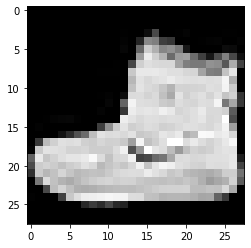

In [30]:
plt.imshow(image.squeeze(), cmap='gray') # squeese out the gray-scale dimension
print('label: {}'.format(label))

In [31]:
batch = next(iter(train_loader))

In [32]:
len(batch)

2

In [33]:
type(batch)

list

In [35]:
images, labels = batch

In [39]:
images.shape # 4-rank tensor or 4-D tensor

torch.Size([10, 1, 28, 28])

In [40]:
labels.shape

torch.Size([10])

In [41]:
# let's make a grid

labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


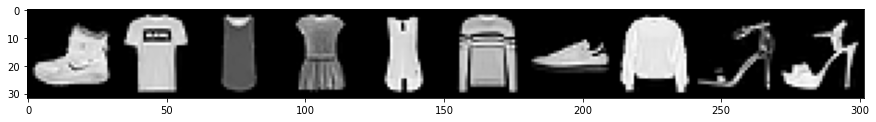

In [45]:
grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1, 2, 0)))
print('labels: {}'.format(labels))

In [46]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)

In [47]:
batch = next(iter(train_loader))

In [48]:
images, labels = batch

In [51]:
grid = torchvision.utils.make_grid(images, nrow=10)

labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8, 4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5,
        2, 1, 6, 6, 7, 9, 5, 9, 2, 7, 3, 0, 3, 3, 3, 7, 2, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5, 0, 2, 0, 0, 4, 1, 3, 1, 6, 3,
        1, 4, 4, 6, 1, 9, 1, 3, 5, 7, 9, 7, 1, 7, 9, 9, 9, 3, 2, 9, 3, 6, 4, 1, 1, 8])


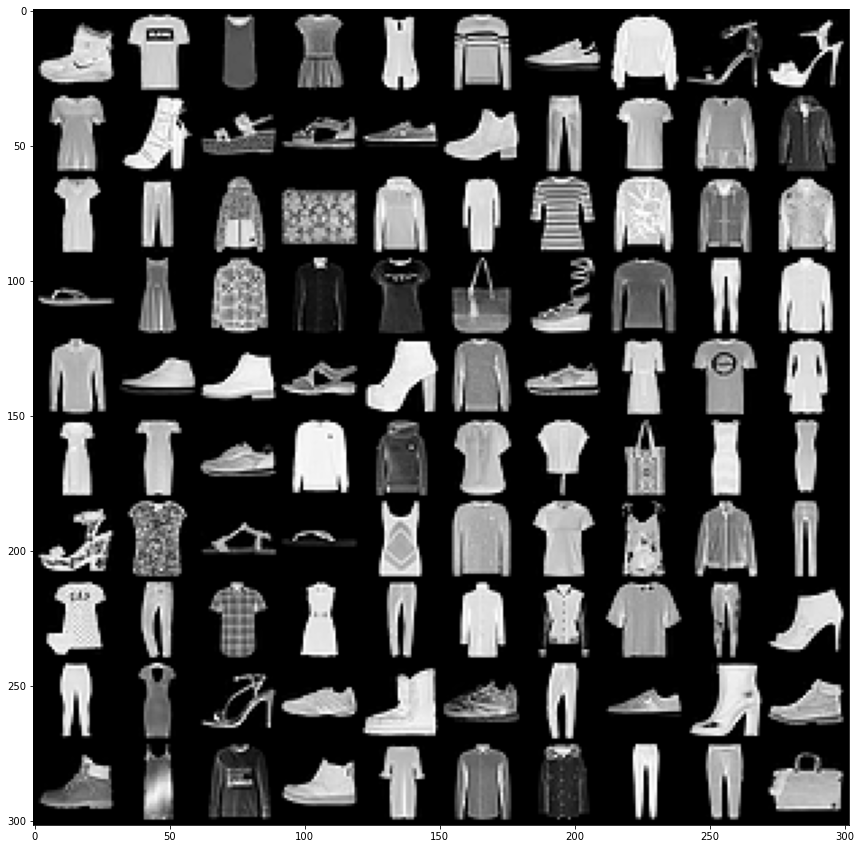

In [52]:
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1, 2, 0)))
print('labels: {}'.format(labels))